In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

In [3]:
df = pd.read_csv('insurance_v4.csv')
df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [5]:
df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [6]:
y = np.array(df['charges'])

X = np.array(df[['age', 'bmi', 'children', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest']])
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.33, random_state = 33)

In [8]:
def plot_params_cs_val_score (parameters, model_type):
    for key in parameters.keys():
        scores=[]
        for value in parameters[key]:

            if model_type == 'RandomForestRegressor':
                model = RandomForestRegressor(**{key : value})
            else:
                print('nope')
                return 0

            tmp = np.mean(cross_val_score(model,x_train,y_train, cv=5))
            scores.append(tmp)
        
        x_plot = parameters[key]
        plt.figure(figsize = (10,5))
        plt.title(model_type)
        plt.plot(x_plot,scores)
        plt.xlabel(key)
        plt.ylabel('validation_score')
        plt.show()

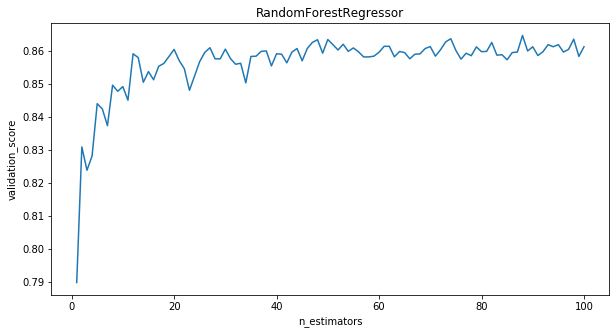

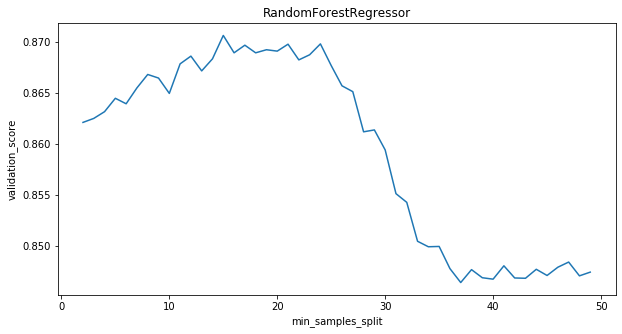

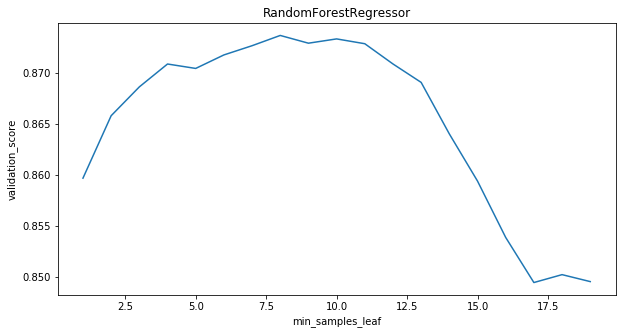

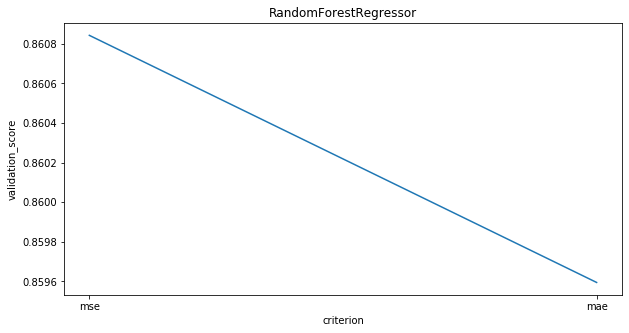

In [9]:
params = {'n_estimators': np.arange(1,101,1),
            'min_samples_split' : np.arange(2,50,1),
            'min_samples_leaf' : np.arange(1,20,1),
            'criterion' : ["mse", "mae"]}

plot_params_cs_val_score(params,model_type = 'RandomForestRegressor')

In [10]:
model = RandomForestRegressor()
params = {'n_estimators': np.arange(20,100,1),
            'min_samples_split' : np.arange(5,30,1),
            'min_samples_leaf' : np.arange(6,12,1),
            'criterion' : ["mse", "mae"]}

grid = GridSearchCV(model, params, cv = 5)
grid.fit(x_train,y_train)
best_par = grid.best_params_
print(best_par)

{'criterion': 'mae', 'min_samples_leaf': 6, 'min_samples_split': 14, 'n_estimators': 32}


In [11]:
model_with_best_par = grid.best_estimator_
model_with_best_par.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=6,
                      min_samples_split=14, min_weight_fraction_leaf=0.0,
                      n_estimators=32, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [12]:
cross_val_score(model_with_best_par, x_train, y_train, cv=5).mean()

0.8736016331203998

### Skutecznosc - wychodzi troszeczke lepsza niz, o 5 tysiecznych bodajze niz wczesniejsze 4 atrybuty, ale widocznie nizsze mse

In [14]:
yPred = model_with_best_par.predict(x_test)
print('rkwadrat: ',r2_score(y_test, yPred))
print('mse: ', np.round(mean_squared_error(y_test, yPred),3))

rkwadrat:  0.8354738974458588
mse:  22496274.339
